----

![](images/pace_plan.png)

The Data is from The HR department at Salifort Motors whereby it collected data from employees. To get clear insights, basic information about the data should be gathered and prepare the dataset for analysis.

- Familiarize with the HR dataset
- Investigate and underastand the data
- Prepare the data for analysis


### Familiarize with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, namely: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import Libraries

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("data/HR_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Investigate and underastand the data

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the dataset.

### Check duplicates

In [8]:
# Check for duplicates

duplicates = df0.duplicated().sum()
print('duplicated rows:', duplicates)

# Percentage of duplicates in the data
print('Percentage of duplicates:',(duplicates / df0.shape[0] )*100)



duplicated rows: 3008
Percentage of duplicates: 20.05467031135409


There are 3,008 rows that contain duplicates. That is 20% of the data.

In [9]:
# Inspect some rows containing duplicates

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

With several continuous variables across 10 columns, it seems `very unlikely` that these observations are legitimate. Proceed by dropping them.

In [10]:
# Drop duplicates

df1 = df0.drop_duplicates()

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

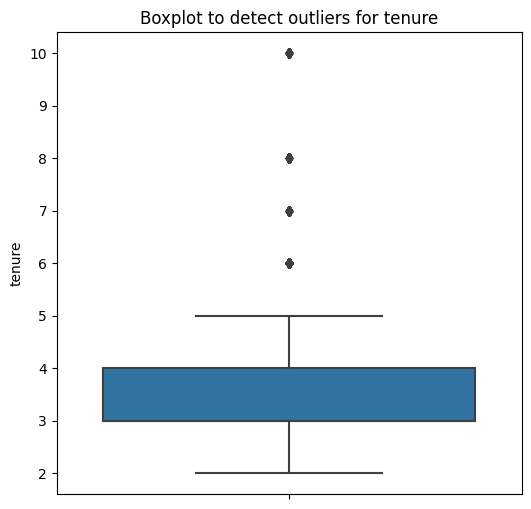

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=df1['tenure'])
plt.title('Boxplot to detect outliers for tenure')
plt.show()

There are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [12]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When building the predictive models, consider whether to remove these outliers based on the type of model that will be used.

----

![](images/pace_analyze.png)

- Perform EDA
- Analyse relationship between variables

### Data visualizations

Start examining the variables and create plots to visualize relationships between variables in the data.

### Average Monthly Hours v Number Project
Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left

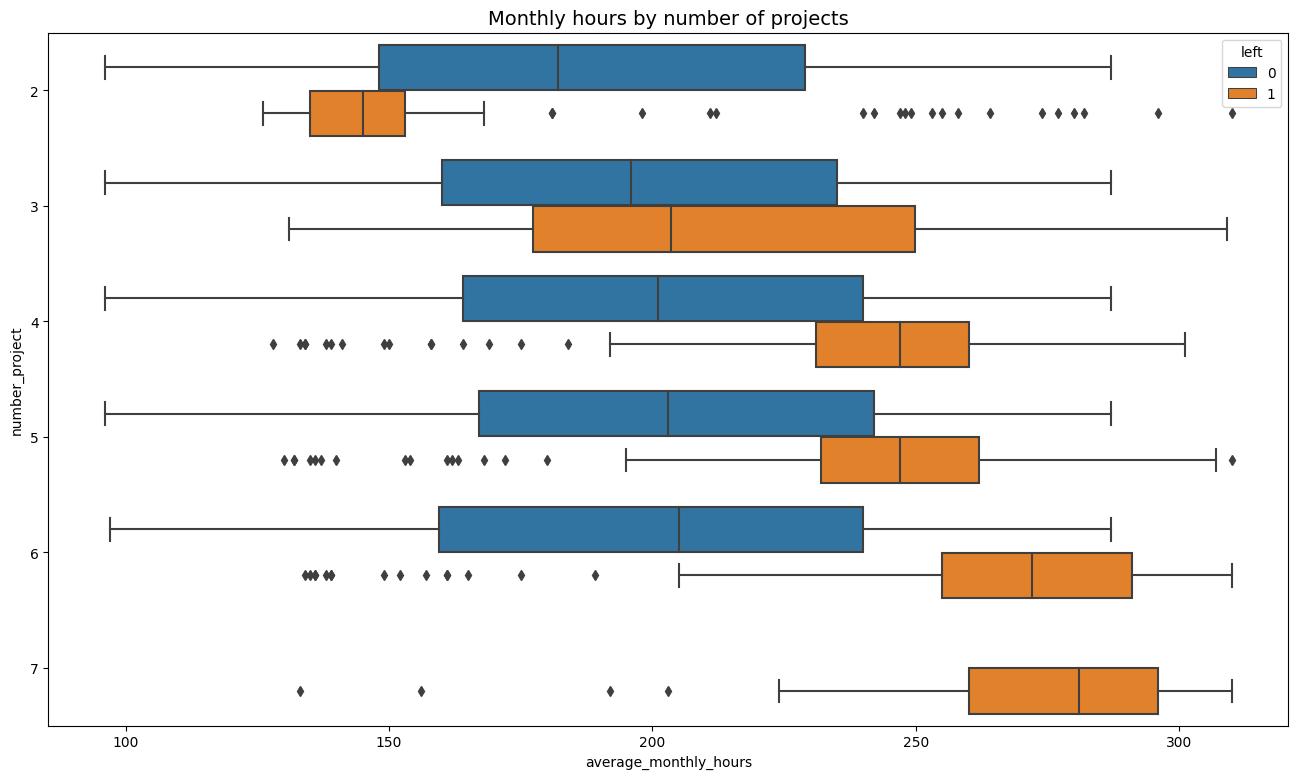

In [13]:
# Create the boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
plt.title('Monthly hours by number of projects', fontsize='14');

From the plots, it appears that people who work on more projects would also work longer hours.
- Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255-295 hours/week, much more than any other group. 

- The optimal number of projects for employees to work on seems to be 3-4. The ratio of left/stayed is very small for these cohorts.

### Average Monthly Hours v Satisfaction Levels
Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed/left


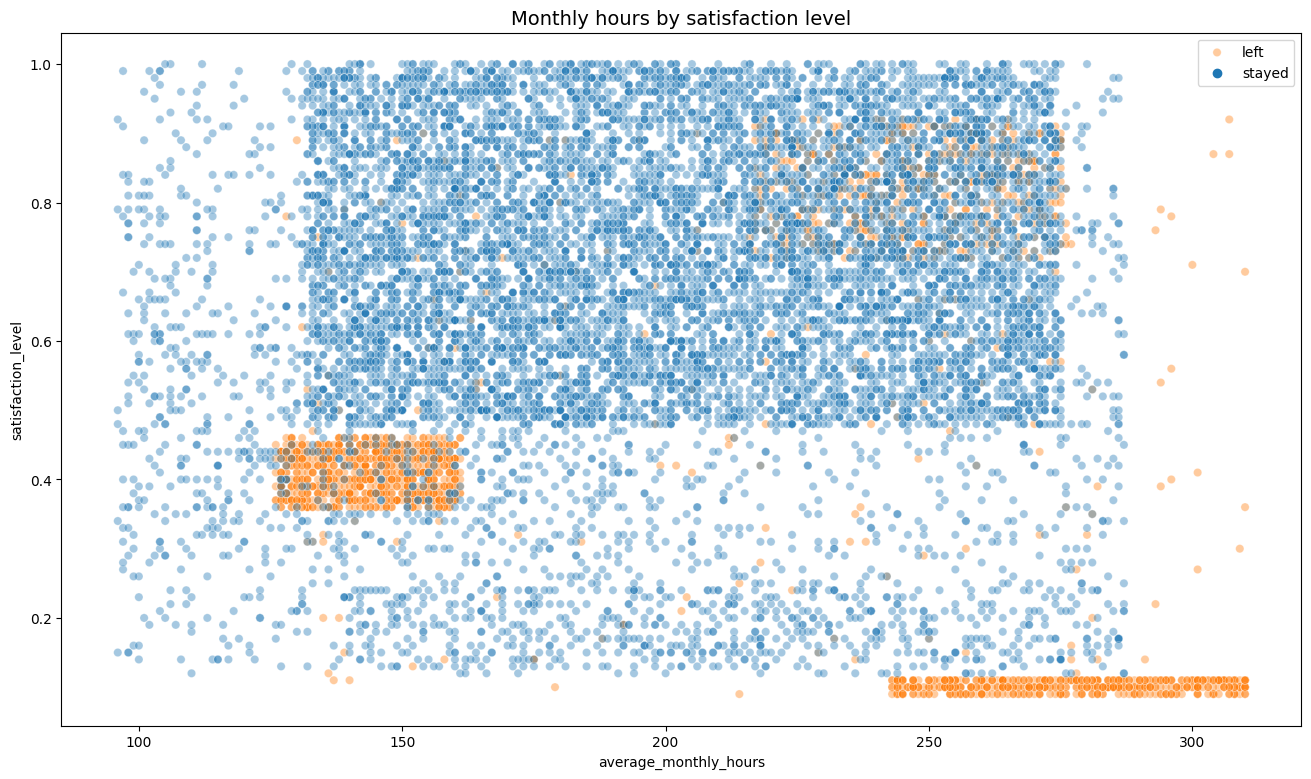

In [14]:
# Create the scatterplot
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

The scatterplot shows:
- Group with `Extreme Working Hours` ~240-315 hours per month - The low satisfaction levels in this group suggest that their workload may be a significant factor in their decision to leave the company

- Group with `Normal Working Hours` - This group has more typical working hours, but their satisfaction levels are still low (around 0.4). It's possible that peer pressure or the perception of an excessive workload among their colleagues may have contributed to their dissatisfaction.

- Group with `Moderate Working Hours` ~210-280 hours per month - Employees in this group work relatively moderate hours and have a wider range of satisfaction levels (0.7-0.9). There is a strange shape of the distributions in this group, it's a valid concern since there were a lot of duplicates in the data.

### Satisfaction levels v Tenure
Create boxplot showing distributions of `satisfaction_level` by `tenure`, comparing employees who stayed versus those who left

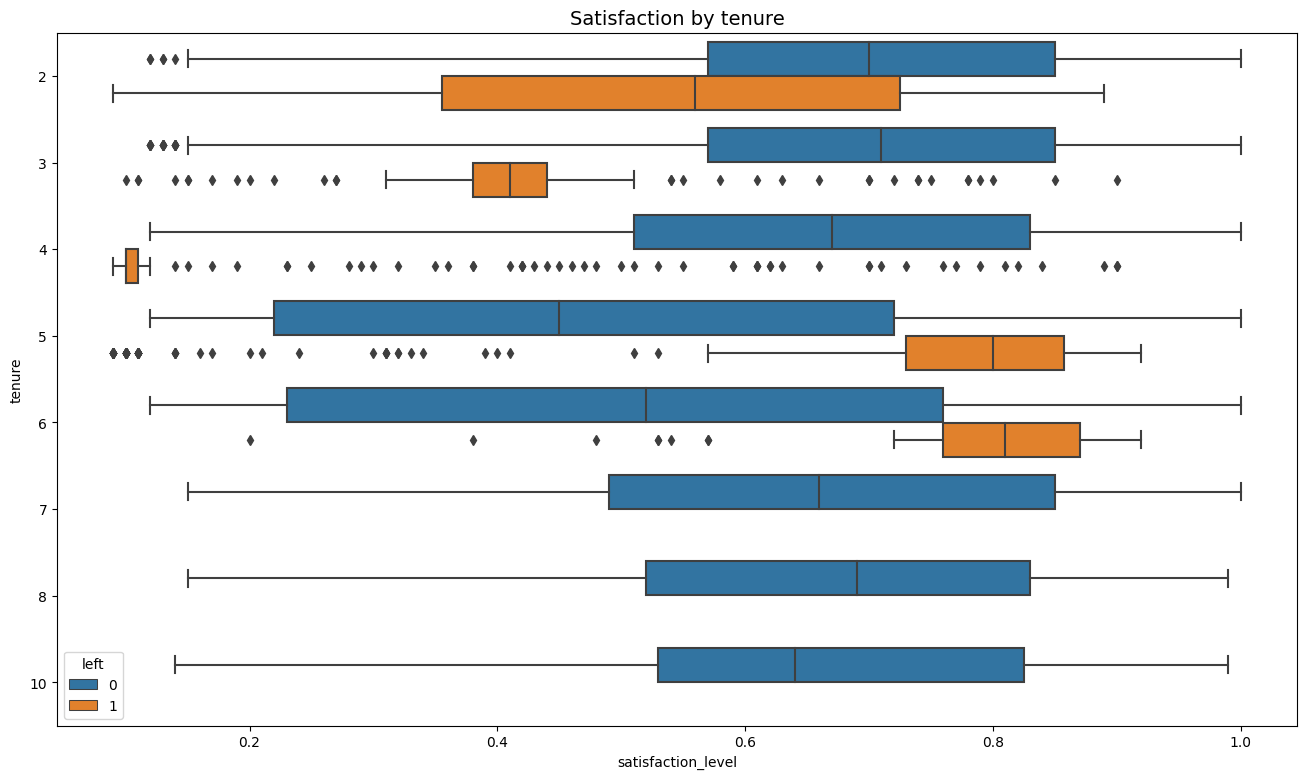

In [15]:
# Create the boxplot

plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
plt.title('Satisfaction by tenure', fontsize='14');

- The longest-tenured employees did not leave, and their satisfaction levels align with those of newer employees who stayed. This suggests that higher tenure might be associated with higher job stability and satisfaction.

- Employees with a four-year tenure who left the company appear to have an unusually low satisfaction level. Investigating whether specific changes to company policies or factors affecting employees at the four-year mark contributed to this trend is a valuable next step.

### Salary v Tenure
Create histogram showing distributions of `salary` by `tenure` (short-tenured employees `<7 `and long-tenured employees `>6` )

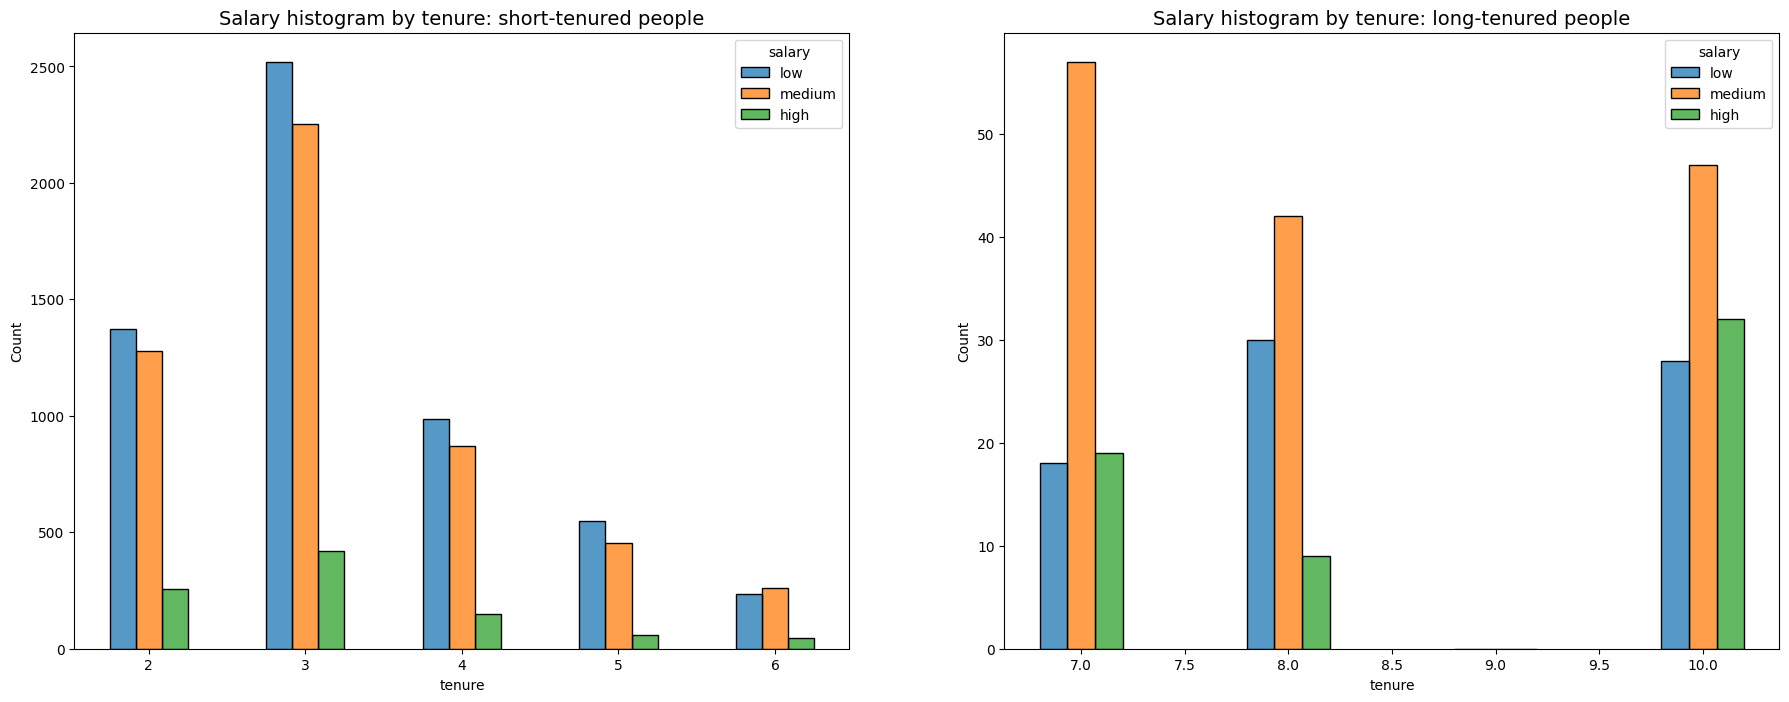

In [16]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plot indicates that employees with long tenures (those who have been with the company for a while) are not necessarily the highest-paid employees. In other words, having a longer tenure doesn't automatically mean they are earning more compared to their colleagues.

### Average Monthly Hours v Last Evaluation
Create scatterplot of `average_monthly_hours` versus `last_evaluation`, comparing employees who stayed/left


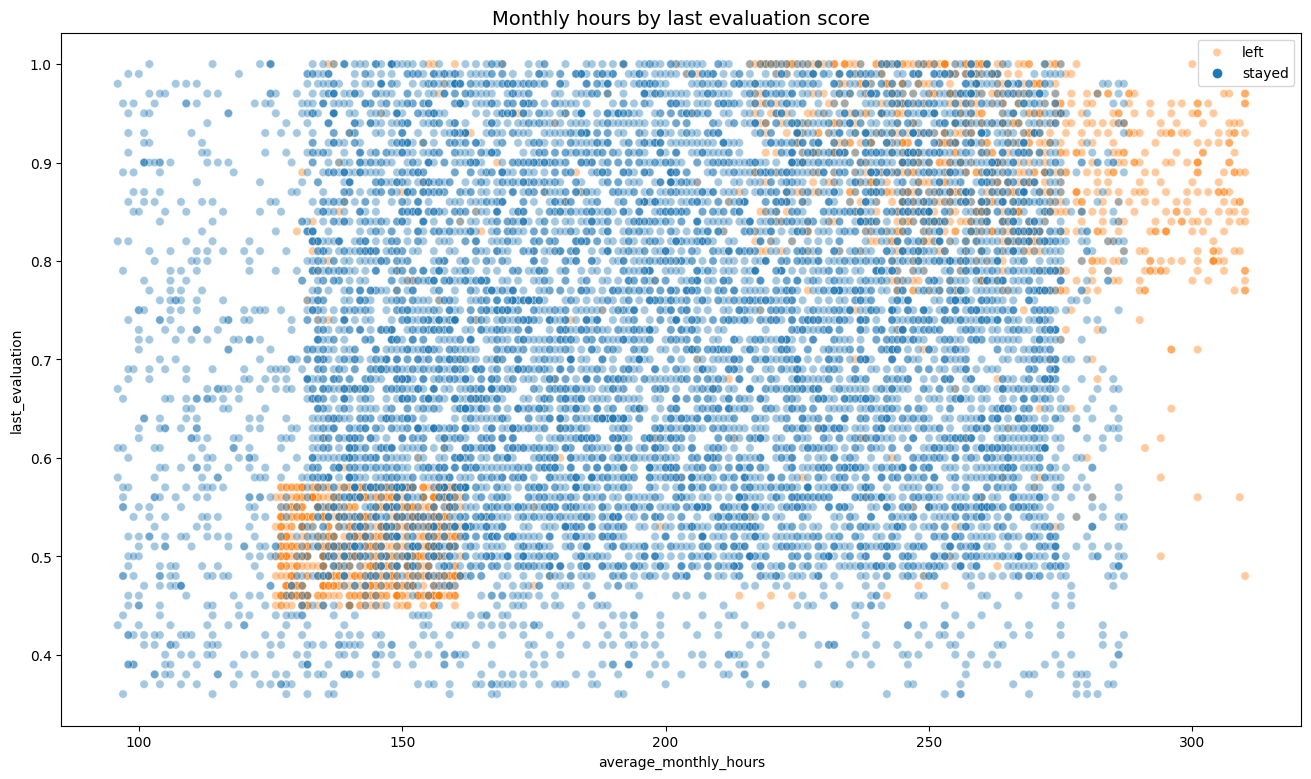

In [17]:
# Create the scatterplot
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The plot reveals two distinct groups of employees who left the company:
Overworked employees who performed very well and Employees who worked slightly below the 150 and had lower evaluation scores.

There appears to be a correlation between the number of hours worked and employees' evaluation scores. Employees who worked more hours tend to have higher evaluation scores, but this relationship is not absolute.

### Average Monthly Hours v Promotion
Create scatterplot of `average_monthly_hours` versus `promotion_last_5years`, to examine whether employees who worked very long hours were promoted in the last five years.

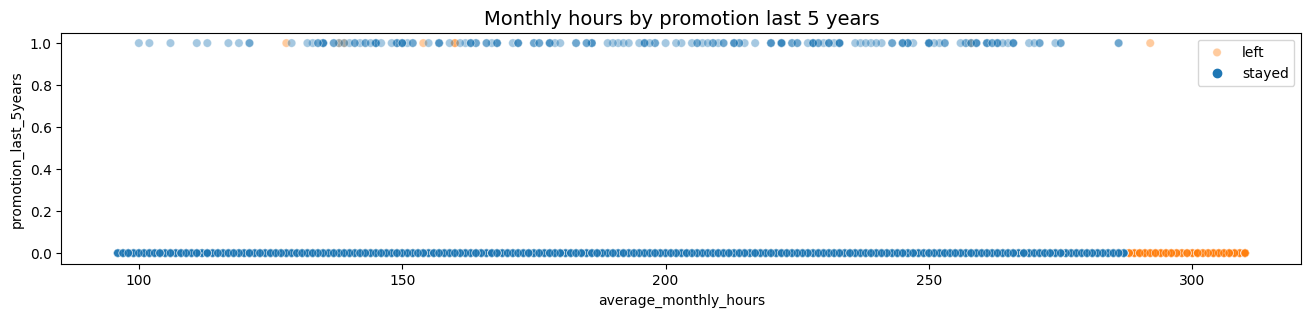

In [18]:
# Create the scatterplot
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot shows that very few employees who worked the most hours were promoted and all of the employees who left were working the longest hours.

### Department v Stayed/left
Create stacked histogram to compare department distribution of employees who left to that of employees who didn't

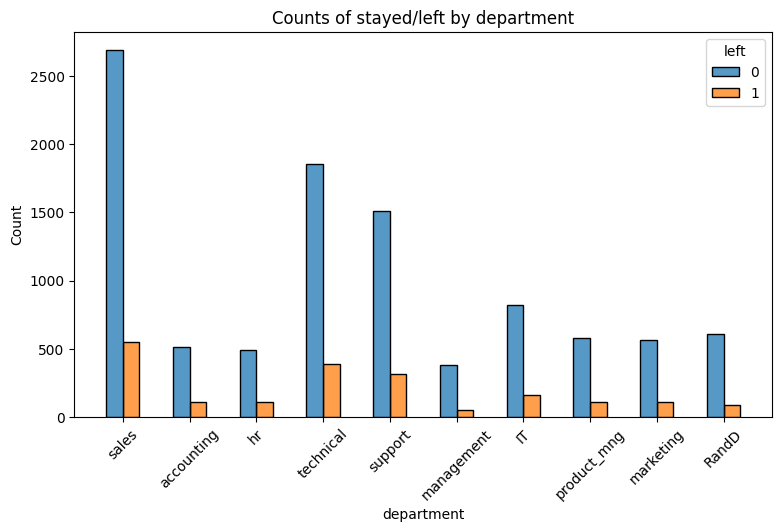

In [19]:
# Create the stacked histogram

plt.figure(figsize=(9,5))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink= 0.5)
plt.xticks(rotation = 45 )
plt.title('Counts of stayed/left by department');

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

### Correlations between variables
Plot a correlation heatmap to find out how different variables are related to one another.

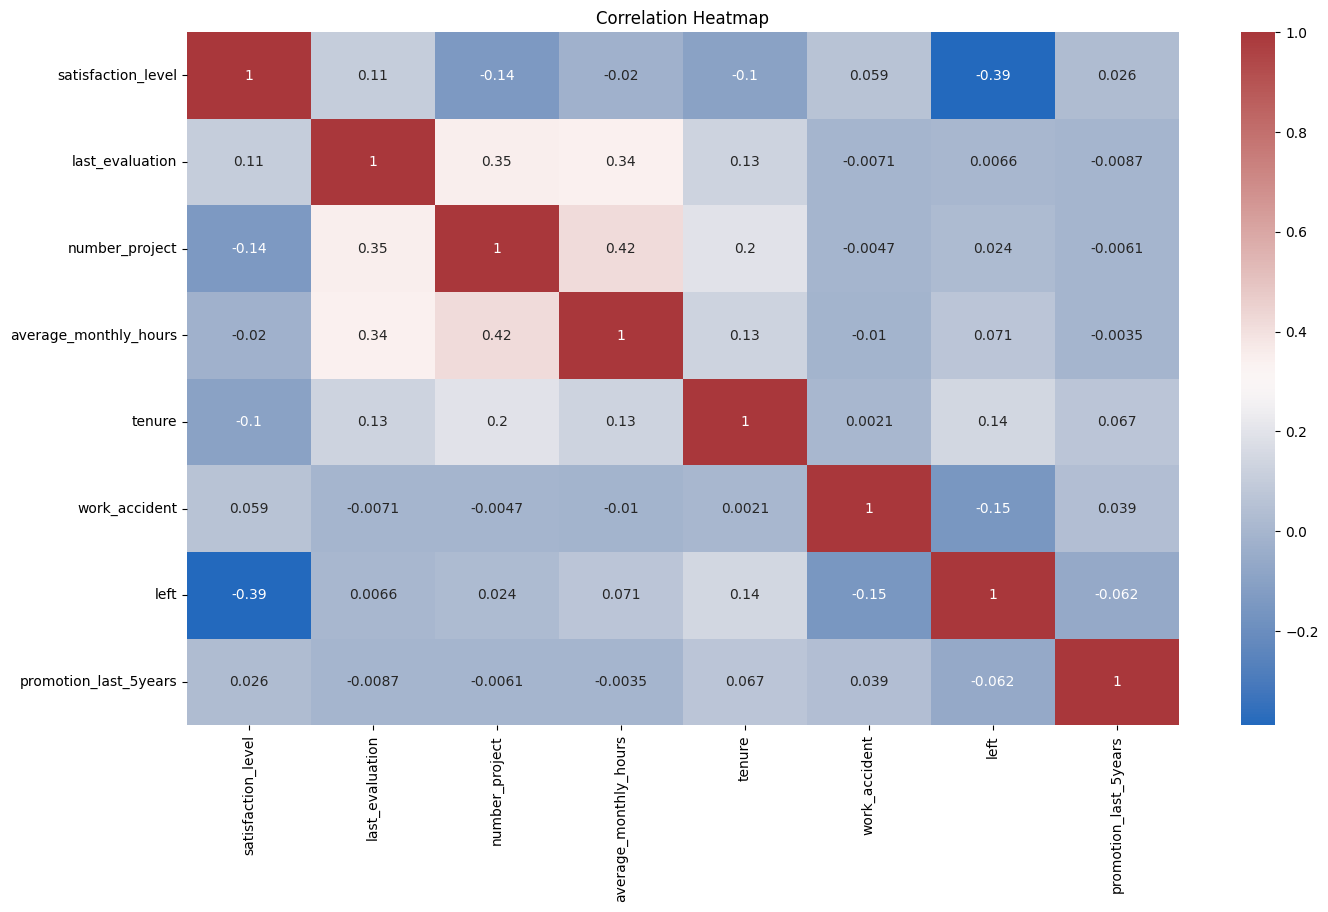

In [20]:
# Plot the correlation heatmap

plt.figure(figsize=(16, 9))
sns.heatmap(df0.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap');

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

- Excessive working hours, especially in the context of high project involvement, is associated with employee turnover and lower satisfaction.
- The optimal balance for employee retention seems to involve moderate project involvement (3-4 projects) and moderate working hours.
- Long tenure is generally associated with higher job stability and satisfaction, but a specific group (four-year employees) with unusually low satisfaction levels may require further investigation.
- Salary alone does not determine tenure or retention, emphasizing the importance of other factors such as workload and satisfaction.
- Promotion rates for employees working the longest hours are low, potentially contributing to turnover.
- Departments do not show significant differences in terms of employee retention.

![](images/pace_construct.png)
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results

### Determine appropriate model
This is a binary classification problem since target variable `left` can be 1 or 0.
Logistic Regression model and a Tree-based Machine Learning model are good in solving such problems.
Construct, compare and select the better of the two.

### Construct Logistic Regression Model

Encode the categorical variables as needed.

In [75]:
# One-hot encode the categorical variables

df_encd = pd.get_dummies(df1)

df_encd.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Feature Engineering

It is likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already identified by management as people to be fired, they may be working fewer hours. 

Proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. It will be a binary variable.

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

Define being overworked as working more than `175 hours` per month on average.

In [76]:
# Make a copy of df_encd
df_2 = df_encd.copy()

# Create `overworked` column.
df_2['overworked'] = (df_encd['average_monthly_hours'] > 175).astype(int)

# Drop 'satisfaction_level', 'average_monthly_hours' columns
df_2 = df_2.drop(columns=['satisfaction_level', 'average_monthly_hours'])

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

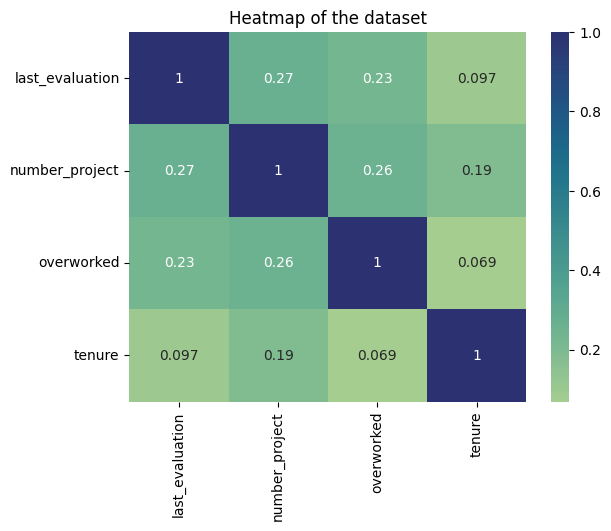

In [77]:
# Create the correlation heatmap

sns.heatmap(df_2[['last_evaluation', 'number_project', 'overworked', 'tenure']].corr(numeric_only=True), annot=True, cmap="crest")
plt.title('Heatmap of the dataset');

Logistic regression is quite sensitive to outliers. It is a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [78]:
# Select rows without outliers in `tenure`

df_lg = df_2[(df_2['tenure'] >= lower_limit) & (df_encd['tenure'] <= upper_limit)]

Select the target variable **left** `y` and predictor variables `X`.

In [79]:
# Set y variable
y = df_lg["left"]

# Remove the target column from the features
X = df_lg.copy()
X = X.drop(columns="left")

X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,overworked
0,0.53,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.88,7,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,0.87,5,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0.52,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,0.50,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Split the data into training set and testing set.

In [80]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct a logistic regression model, fit trainig data and get predictions.

In [81]:
# Construct the logistic model
log_clf = LogisticRegression(random_state=42, max_iter=500)

# Fit the training data
log_clf.fit(X_train, y_train)

# Get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

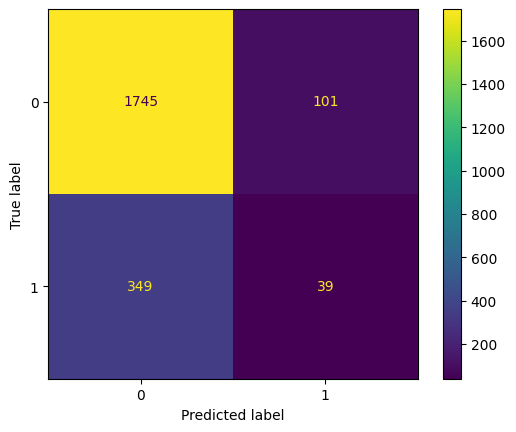

In [82]:
# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix
disp.plot()

plt.show()

The model correctly predicted 1745 True Negatives and 39 True Positives. It has misclassified 450 (349 False Negatives and 101 False Positives).

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [83]:
df_lg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [84]:
# Create classification report
target_names = ['could NOT leave', 'could leave']
lg_report = classification_report(y_test, y_pred, target_names=target_names)
print(lg_report)

                 precision    recall  f1-score   support

could NOT leave       0.83      0.95      0.89      1846
    could leave       0.28      0.10      0.15       388

       accuracy                           0.80      2234
      macro avg       0.56      0.52      0.52      2234
   weighted avg       0.74      0.80      0.76      2234



The logistic regression model achieved **weighted avg** a precision of 74%, recall of 80%, f1-score of 76% and accuracy of 80%.

### Construct Tree-Based Model
- Desicion Tree
- Random Forest
- XGBoost

Select the target variable **left** `y` and predictor variables `X`.

In [85]:
# y variable `left`
y = df_2['left']

# X predictor variables
X = df_2.copy()
X = X.drop(columns="left")

Split the data into training, validating, and testing sets.

In [86]:
# Creating test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creating validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

### Desision Tree

In [87]:
# Instantiate model
dt_clf = DecisionTreeClassifier(random_state=42)

# Hyperparameters to tune
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearchCV object
dt_cv = GridSearchCV(dt_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Now fit the model to the training data.

In [88]:
dt_cv.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'precision', 'accuracy'})

Check best params and the best AUC score on CV

In [89]:
print ('Best parameters: ',dt_cv.best_params_)
print('Best score: ', dt_cv.best_score_)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best score:  0.9520967211214516


This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search. 

In [90]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract AUC Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    data = {
        'Model': [model_name],
        'AUC': [auc],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1],
        'Accuracy': [accuracy],
    }

    table = pd.DataFrame(data)
  
    return table

Use the function just defined to get all the scores from grid search.

In [91]:
# Get all scores
dt_cv_results = make_results('decision tree cv', dt_cv, 'auc')
dt_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.952097,0.824371,0.906282,0.862614,0.951906


All of these scores from the decision tree model are strong indicators of good model performance but decision trees can be vulnerable to overfitting.

### Random Forest

In [92]:
# Instantiate model
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameters to tune
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3],
             'n_estimators': [300],
             } 

# Scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearchCV object
rf_cv = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Now fit the model to the training data. 

**_Note_**: The following operation may take some time to complete. Therefore, the cell has been commented out along with code cell that follows (where the model is pickled). To save time, you can skip these cells and continue to execute the cells in order.

In [93]:
# # fit the training data
# rf_cv.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3], 'n_estimators': [300]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'precision', 'accuracy'})

In [94]:
# # Save the model to pickle
# with open('data/rf_cv.pickle', 'wb') as write_pickle:
#     pickle.dump(rf_cv, write_pickle)


In [95]:
with open('data/rf_cv.pickle', 'rb') as read_pickle:
    rf_cv = pickle.load(read_pickle)

Check best params and the best AUC score on CV

In [96]:
print ('Best parameters: ',rf_cv.best_params_)

print('Best score: ', rf_cv.best_score_)

Best parameters:  {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.9648165053466269


Get all score of Random Forest

In [97]:
# Get all scores
rf_cv_results = make_results('random forest cv', rf_cv, 'auc')
print(dt_cv_results)
print(rf_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.952097   0.824371  0.906282  0.862614  0.951906
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.964817   0.869904  0.893717  0.881588  0.960105


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.013 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

### XGBoost

In [98]:
# Instantiate model
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Hyperparameters to tune
cv_params = {'max_depth': [8,12], 
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# Scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearchCV object
xgb_cv = GridSearchCV(xgb_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Now fit the model to the training data. 

**_Note_**: The following operation may take some time to complete. Therefore, the cell has been commented out along with code cell that follows (where the model is pickled). To save time, you can skip these cells and continue to execute the cells in order.

In [99]:
# # Fit the training data
# xgb_cv.fit(X_tr, y_tr)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [8, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'precision', 'accuracy'})

In [100]:
# # Save the model to pickle
# with open('data/xgb_cv.pickle', 'wb') as write_pickle:
#     pickle.dump(xgb_cv, write_pickle)


In [101]:
with open('data/xgb_cv.pickle', 'rb') as read_pickle:
    xgb_cv = pickle.load(read_pickle)

Check best params and the best AUC score on CV

In [102]:
print ('Best parameters: ',xgb_cv.best_params_)

print('Best score: ', xgb_cv.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 300}
Best score:  0.9684460043386874


Get all score of XGBoost

In [103]:
# Get all scores
xgb_cv_results = make_results('xgboost cv', xgb_cv, 'auc')
print(dt_cv_results)
print(rf_cv_results)
print(xgb_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.952097   0.824371  0.906282  0.862614  0.951906
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.964817   0.869904  0.893717  0.881588  0.960105
        Model       AUC  Precision    Recall        F1  Accuracy
0  xgboost cv  0.968446   0.898676  0.883673  0.891005  0.964137


The evaluation scores of the XGBoost model are better than those of the decision tree model and random forest model, with some small negligible exception. This indicates that the XGBoost model mostly outperforms the decision tree model and the random forest model.

### Evaluate on validation set.

Define a function that gets all the scores from a model's predictions.

In [104]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

Apply the function defined above to get scores for the decision tree model, the random forest model and the XGBoost model. 

In [105]:
# Get validation results for all 3 models
dt_val_results = get_scores('decision tree validation', dt_cv, X_val, y_val)
rf_val_results = get_scores('random forest validation', rf_cv, X_val, y_val)
xgb_val_results = get_scores('xgboost validation', xgb_cv, X_val, y_val)

# Join the results into a table
val_results = [dt_val_results, rf_val_results, xgb_val_results]
val_results = pd.concat(val_results)
val_results

,model,AUC,precision,recall,f1,accuracy
0,decision tree validation,0.928,0.786,0.905,0.841,0.943
0,random forest validation,0.938,0.861,0.905,0.882,0.960
0,xgboost validation,0.932,0.893,0.884,0.889,0.963


It appears that the XGBoost model performs slightly better than the decision tree and the random forest, across most of the evaluation metrics.

Use this XGBoost model to predict on the test set now.

In [106]:
xgb_test_score = get_scores('xgboost model', xgb_cv, X_test, y_test)
xgb_test_score

,model,AUC,precision,recall,f1,accuracy
0,xgboost model,0.939,0.893,0.899,0.896,0.965


The final model seems to be a well-performing one.

Create a confusion matrix to visualize the results of the XGBoost model. 

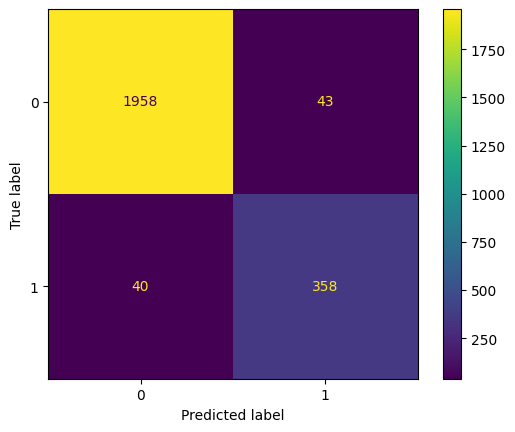

In [109]:
y_pred = xgb_cv.best_estimator_.predict(X_test)

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=xgb_cv.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix
disp.plot();


The model has correctly classified 2316 (1958 True Negatives and 358 True Positives) and misclassified 83(43 False Positives and 40 False Negatives). The model predicts more false positives than false negatives which is a good thing for the problem at hand.

Given the nature of predicting employee turnover, many organizations often prioritize reducing false negatives. The cost of losing key employees is often higher than the cost of implementing retention strategies for employees who end up staying.



##### **Feature importance**

Inspect the top 10 most important features of the final model.

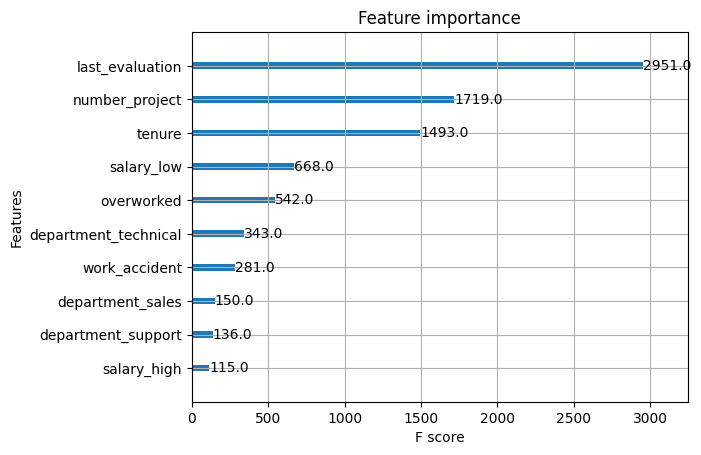

In [119]:
plot_importance(xgb_cv.best_estimator_, max_num_features=10);

This shows that in this XGBoost model, `last_evaluation`, `number_project`, `tenure`, `salary_low` and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

![PACE - Execute Stage](images/pace_execute.png)
- Interpret model performance and results
- Share actionable steps with stakeholders

### Results of the models

**Logistic Regression**

The logistic regression model achieved **weighted avg** a precision of 74%, recall of 80%, f1-score of 76% and accuracy of 80%, on the test set.

**Tree-based Models**

The xgboost slightly outperformed the decision tree and random forest models, achieved AUC of 93.9%, precision of 89.3%, recall of 89.9%, f1-score of 89.6%, and accuracy of 96.5%, on the test set.

### Conclusion, Recommendations, Next Steps

**Next Steps**
